In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
#Checking working directory
os.getcwd()

'D:\\Learning\\USF - Data Science Programming\\Assignment 2'

In [4]:
#Recreating the merged dataframe from Assignment 1
df = pd.read_csv("dengue_features_train.csv")
df_rn = df.copy()
df_rn.columns = df_rn.columns.str.replace('station', 'stn')
df_rn.columns = df_rn.columns.str.replace('precip', 'prec')
df_rn.columns = df_rn.columns.str.replace('humidity', 'hd')
df_rn.columns = df_rn.columns.str.replace('reanalysis', 're_an')
df_rn.year = df_rn.year.astype('category')
df_pred = pd.read_csv("dengue_labels_train.csv")
df_merged = pd.merge(df_rn, df_pred, on=['city','year','weekofyear'], how='outer')
df_merged = df_merged.fillna(method='ffill')

In [5]:
#Creating a copy of the dataframe to work on 
df_copy = df_merged.copy()

In [6]:
#Changing types of 'city' and 'weekstartdate' for further computations
df_copy['city'] = df_copy['city'].astype('category')
df_copy['week_start_date'] = df_copy['week_start_date'].astype('datetime64[ns]')

In [7]:
#Extracting month from 'weekstartdate' and dropping the variable
df_copy['month'] = df_copy['week_start_date'].dt.month
df_copy = df_copy.drop(['week_start_date'], axis = 1)

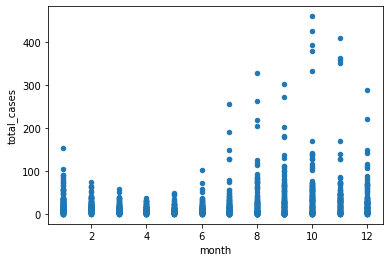

In [8]:
#Checking for correlation between months of the year and the target variable
df_copy.plot.scatter(x = "month",
                    y = "total_cases")

In [9]:
#Copying the names of all columns to a list
cols = df_copy.columns.to_list()

In [10]:
cols

['city',
 'year',
 'weekofyear',
 'ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precitation_amt_mm',
 're_an_air_temp_k',
 're_an_avg_temp_k',
 're_an_dew_point_temp_k',
 're_an_max_air_temp_k',
 're_an_min_air_temp_k',
 're_an_prec_amt_kg_per_m2',
 're_an_relative_hd_percent',
 're_an_sat_prec_amt_mm',
 're_an_specific_hd_g_per_kg',
 're_an_tdtr_k',
 'stn_avg_temp_c',
 'stn_diur_temp_rng_c',
 'stn_max_temp_c',
 'stn_min_temp_c',
 'stn_prec_mm',
 'total_cases',
 'month']

In [11]:
#Rearranging the column indexes to make the split into X,y easier
cols = cols[-2:] + cols[:-2]

In [12]:
cols

['total_cases',
 'month',
 'city',
 'year',
 'weekofyear',
 'ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precitation_amt_mm',
 're_an_air_temp_k',
 're_an_avg_temp_k',
 're_an_dew_point_temp_k',
 're_an_max_air_temp_k',
 're_an_min_air_temp_k',
 're_an_prec_amt_kg_per_m2',
 're_an_relative_hd_percent',
 're_an_sat_prec_amt_mm',
 're_an_specific_hd_g_per_kg',
 're_an_tdtr_k',
 'stn_avg_temp_c',
 'stn_diur_temp_rng_c',
 'stn_max_temp_c',
 'stn_min_temp_c',
 'stn_prec_mm']

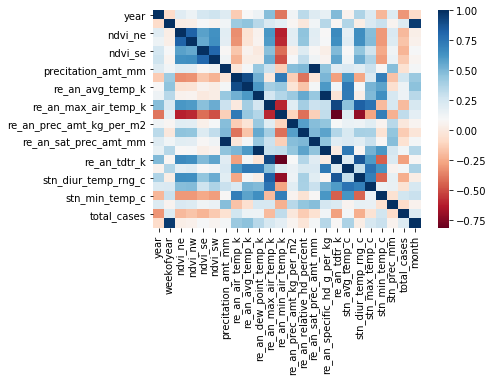

In [13]:
corr_matrix = df_copy.corr()
import seaborn as sns
sns.heatmap(corr_matrix, cmap='RdBu')
plt.show()

In [15]:
#Storing all the categorical and numerical variables in two separate lists for encoding & standardizing respectively
cat_cols = ["city", "month", "weekofyear"]
num_cols = ["ndvi_ne", "ndvi_nw", "ndvi_se", "ndvi_sw", "precitation_amt_mm", "re_an_air_temp_k",
           "re_an_avg_temp_k",
           "re_an_dew_point_temp_k",
           "re_an_max_air_temp_k",
           "re_an_min_air_temp_k",
           "re_an_prec_amt_kg_per_m2",
           "re_an_relative_hd_percent",
           "re_an_sat_prec_amt_mm",
           "re_an_specific_hd_g_per_kg",
           "re_an_tdtr_k",
           "stn_avg_temp_c",
           "stn_diur_temp_rng_c",
           "stn_max_temp_c",
           "stn_min_temp_c",
           "stn_prec_mm",
           "month",
           "year"]

In [16]:
#Storing the target variable 'total cases' in y
y = df_copy["total_cases"]

In [17]:
#Storing all the columns of modified 'merged' dataframe in X
X = df_copy[cols]

In [20]:
#Removing the target column from the 'X' dataframe
X = X.iloc[:,1:]

In [21]:
#Verifying if the operations have been performed correctly
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   month                       1456 non-null   int64   
 1   city                        1456 non-null   category
 2   year                        1456 non-null   int64   
 3   weekofyear                  1456 non-null   int64   
 4   ndvi_ne                     1456 non-null   float64 
 5   ndvi_nw                     1456 non-null   float64 
 6   ndvi_se                     1456 non-null   float64 
 7   ndvi_sw                     1456 non-null   float64 
 8   precitation_amt_mm          1456 non-null   float64 
 9   re_an_air_temp_k            1456 non-null   float64 
 10  re_an_avg_temp_k            1456 non-null   float64 
 11  re_an_dew_point_temp_k      1456 non-null   float64 
 12  re_an_max_air_temp_k        1456 non-null   float64 
 13  re_an_min_air_temp

In [22]:
#Creating a 80:20 stratified train-test split based on the City 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = X["city"], test_size = 0.2, random_state = 42, shuffle = True)

In [23]:
#Importing the StandardScaler and OneHotEncoder for pre-processing the numerical & categorical variables respectively
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ohe = OneHotEncoder(sparse=False)

#Transforming the training data
X_tr_scaled_cols = ss.fit_transform(X_train[num_cols])
X_tr_encoded_cols = ohe.fit_transform(X_train[cat_cols])

In [24]:
#Transforming the test data
X_test_scaled_cols = ss.transform(X_test[num_cols])
X_test_encoded_cols = ohe.transform(X_test[cat_cols])

In [25]:
#Concatenating the numerical & categorical variables in the training set
X_tr_scaled = np.concatenate([X_tr_scaled_cols, X_tr_encoded_cols], axis = 1)

In [26]:
X_test_scaled = np.concatenate([X_test_scaled_cols, X_test_encoded_cols], axis = 1)

In [43]:
#Initializing the SGDRegressor from sklearn's libraries
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(random_state=42, penalty=None, loss='huber')

In [44]:
#Calling the model to learn the scaled training data & labels 
sgd_reg.fit(X_tr_scaled, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='huber', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [45]:
#Running a prediction test on the scaled training data & comparing against the training labels
y_predict = sgd_reg.predict(X_tr_scaled)

In [46]:
#Visualizing the first 10 predictions on the train data
y_predict[:10]

array([ 3.55913533, 13.08905126, 10.88688065, 10.17566688,  9.73967834,
        0.33280343,  4.9302921 , 15.67340963,  6.25009123, 16.22433246])

In [47]:
#Visualizing the first 10 labels on the train data
y_train[:10]

1449     7
295     23
571      6
306      4
823      7
1247     0
962      0
382     47
1130     3
437     80
Name: total_cases, dtype: int64

In [48]:
#Calculating the mean absolute error on the train predictions to observe model performance
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_train, y_predict)
mae

18.09183257636231

### Choosing evaluation metrics, reasoning & explanations
MAE is chosen as the evaluation metric since the competition submission demands the metric. Absolute error is basically the difference between the predicted value & the actual value. Assume y1 is the actual value & y2 is the predicted value, 

Prediction Error = y2 - y1

However, since in some cases y2 < y1 - we could end up with a negative value. Hence, we take the absolute value of the error. MAE calculates the error / distance between predicted & actual values for all instances, takes their absolute value and averages them out. Generally, the lower the MAE - the closer your predictions are to the actual values. In our case, the MAE on the training data is 17.11. 

### GridSearchCV for optimizing hyper-parameters
Since I used a plain regressor with no hyperparameter tuning on the train data previously, I am going to use the GridSearchCV module of 'sklearn' to experiment with a set of different hyper-parameters. I am creating a dictionary with key-value pairs representing different hyperparameters & the values that they can take on in the SGDRegressor model. This will then be used in conjunction with the GridSearchCV to estimate the best set of hyperparameters.  

### Hyper-Parameters in Stochastic Gradient Descent 

Few of the hyper-parameters that can be tuned in SGD are, 

1) Learning Rate - The value of the learning rate determines the step size it takes approaching the minimum of the loss function. There is a trade-off between learning rates & model performance. Very low learning rate is more reliable and has a higher probability of converging at the loss function minima. However, since the step size is smaller - it can take a lot of time to converge. If the learning rate is set too high, then the step size may be too big that it overshoots the minimum.

2) Loss Function - It can take on multiple values such as 'Square_Loss', 'Epsilon_Insensitive' and 'Huber'. The 'Squared_Loss' function uses an Ordinary Least Squares Method. 

3) Regulariziation - The regularization terms that can be specified are 'l1','l2' or 'elasticnet'. The regularization parameter helps to avoid overfitting. 

In [60]:
#Importing the GridSearchCV module and running it with the SGDRegressor. Finally, training the SGDRegressor with
#the best set of hyperparameters on my data. 
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}

model = SGDRegressor(max_iter=50000)
clf = GridSearchCV(model, param_grid)
clf.fit(X_tr_scaled, y_train)

C:\Users\kaush\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\kaush\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\kaush\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\kaush\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\kaush\Anaconda3\lib\site-pa

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=50000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]),
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'loss': ['squared_loss', 'huber',
    

### Choosing hyperparameters

Among the hyperparameters discussed above, the values chosen for them based on the results of GridSearchCV are,

1) Learning Rate - 'invscaling' 
2) Loss Function - 'squared loss'
3) Regularization - 'L2'

In [73]:
optimised_sgd = SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=50000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False)

In [76]:
optimised_sgd

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [77]:
#Using the SGDRegressor with optimal hyperparameters on training data
y_pred_grid = clf.predict(X_tr_scaled)

### Improvement in predictions of model with optimized hyperparameters

Calculating MAE using predictions from the model with optimized hyperparameters. The MAE goes up further as you can see in the results below. So, I will be sticking with my earlier model with default hyper params & 'huber' loss function. 

In [81]:
mae_grid = mean_absolute_error(y_train, y_pred_grid)
mae_grid

19.605287137233883

In [82]:
#Running predictions on the test data using model with params from GridSearchCV
y_pred_grid_test = clf.predict(X_test_scaled)

In [83]:
#Calculating MAE for the predictions on the test data
mae_test_grid = mean_absolute_error(y_test, y_pred_grid_test)
mae_test_grid

19.582563589638664

In [85]:
#Calculating MAE for the predictions on test data with original model having 'huber' loss function 
y_test_results = sgd_reg.predict(X_test_scaled)

In [86]:
mae_test_orig = mean_absolute_error(y_test_results, y_test)
mae

18.09183257636231

[Text(0, 0.5, 'Test Predictions'), Text(0.5, 0, 'Test Labels')]

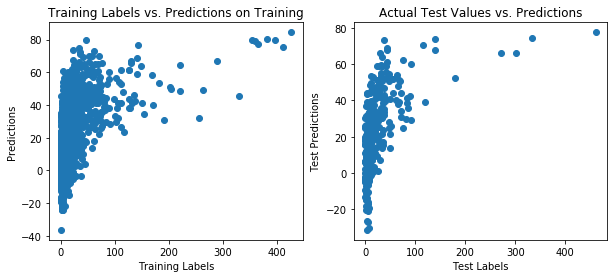

In [91]:
#Plotting the predictions vs. actual values for training & test data
plt.rcParams['figure.figsize'] = (10, 4)
figure, axes = plt.subplots(ncols=2)
axes[0].scatter(y_train, y_pred_grid)
axes[0].set_title('Training Labels vs. Predictions on Training')
axes[0].set(xlabel="Training Labels",ylabel="Predictions")
axes[1].scatter(y_test, y_pred_grid_test)
axes[1].set_title('Actual Test Values vs. Predictions')
axes[1].set(xlabel="Test Labels", ylabel="Test Predictions")

In [93]:
#Initializing the SGD with 'huber' loss function
new_SGD = sgd_reg

In [94]:
#Creating the values needed to plot the learning curve
#Code has been taken from Chap 4 of textbook & modified to suit my use case

train_errors, test_errors = [], []
for m in range(1, len(X_tr_scaled)):
    new_SGD.fit(X_tr_scaled[:m], y_train[:m])
    y_train_predict = new_SGD.predict(X_tr_scaled[:m])
    y_test_predict = new_SGD.predict(X_test_scaled)
    train_errors.append(mean_absolute_error(y_train[:m], y_train_predict))
    test_errors.append(mean_absolute_error(y_test, y_test_predict))

Text(0, 0.5, 'MAE')

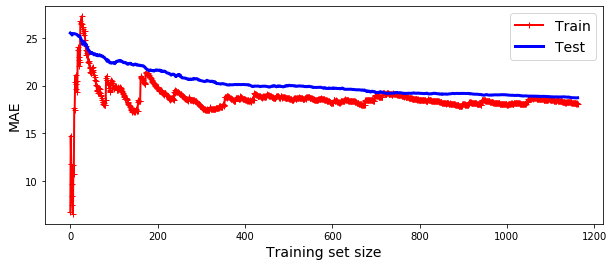

In [95]:
plt.plot(train_errors, "r+-", linewidth=2, label = "Train")
plt.plot(test_errors, "b-", linewidth=3, label = "Test")
plt.legend(loc="upper right", fontsize=14) 
plt.xlabel("Training set size", fontsize=14)
plt.ylabel("MAE", fontsize=14)              

### Using the test data from DrivenData website and making predictions

In [118]:
df_dengai = pd.read_csv("dengue_features_test.csv")

In [119]:
df_dengai.isna().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

In [120]:
df_dengai = df_dengai.fillna(method='ffill')

In [121]:
#Changing types of 'city' and 'weekstartdate' for further computations
df_dengai['city'] = df_dengai['city'].astype('category')
df_dengai['week_start_date'] = df_dengai['week_start_date'].astype('datetime64[ns]')

In [122]:
#Extracting month from 'weekstartdate' and dropping the variable
df_dengai['month'] = df_dengai['week_start_date'].dt.month
df_dengai = df_dengai.drop(['week_start_date'], axis = 1)

In [123]:
cols = df_dengai.columns.to_list()
cols

['city',
 'year',
 'weekofyear',
 'ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm',
 'month']

In [124]:
dengai_cat_cols = ["city", "month", "weekofyear"]
dengai_num_cols = ["ndvi_ne", "ndvi_nw", "ndvi_se", "ndvi_sw", "precipitation_amt_mm", "reanalysis_air_temp_k",
           "reanalysis_avg_temp_k",
           "reanalysis_dew_point_temp_k",
           "reanalysis_max_air_temp_k",
           "reanalysis_min_air_temp_k",
           "reanalysis_precip_amt_kg_per_m2",
           "reanalysis_relative_humidity_percent",
           "reanalysis_sat_precip_amt_mm",
           "reanalysis_specific_humidity_g_per_kg",
           "reanalysis_tdtr_k",
           "station_avg_temp_c",
           "station_diur_temp_rng_c",
           "station_max_temp_c",
           "station_min_temp_c",
           "station_precip_mm",
           "month",
           "year"]

In [125]:
dengai_encoded_cols = ohe.fit_transform(df_dengai[dengai_cat_cols])
dengai_scaled_cols = ss.fit_transform(df_dengai[dengai_num_cols])

In [126]:
dengai_test_scaled = np.concatenate([dengai_scaled_cols, dengai_encoded_cols], axis = 1)

In [127]:
dengai_predictions = sgd_reg.predict(dengai_test_scaled)

In [134]:
#Creating dataframe for submission on DrivenData
dengai_predictions = dengai_predictions.astype('int64')
df_results = pd.DataFrame(dengai_predictions, columns=["total_cases"])

In [135]:
df_results = df_results.assign(**{c: df_dengai[c].to_numpy() for c in ('city', 'year', 'weekofyear')})

In [136]:
res_cols = ['city', 'year', 'weekofyear', 'total_cases']

In [137]:
results_df = df_results[res_cols]

In [138]:
results_df.to_csv('submission.csv', index=False)

In [139]:
results_df

city  year  weekofyear  total_cases
0     sj  2008          18           12
1     sj  2008          19           13
2     sj  2008          20           12
3     sj  2008          21           13
4     sj  2008          22           13
..   ...   ...         ...          ...
411   iq  2013          22            2
412   iq  2013          23            1
413   iq  2013          24            1
414   iq  2013          25            0
415   iq  2013          26            0

[416 rows x 4 columns]

### Score on DrivenData website

In [142]:
from PIL import Image

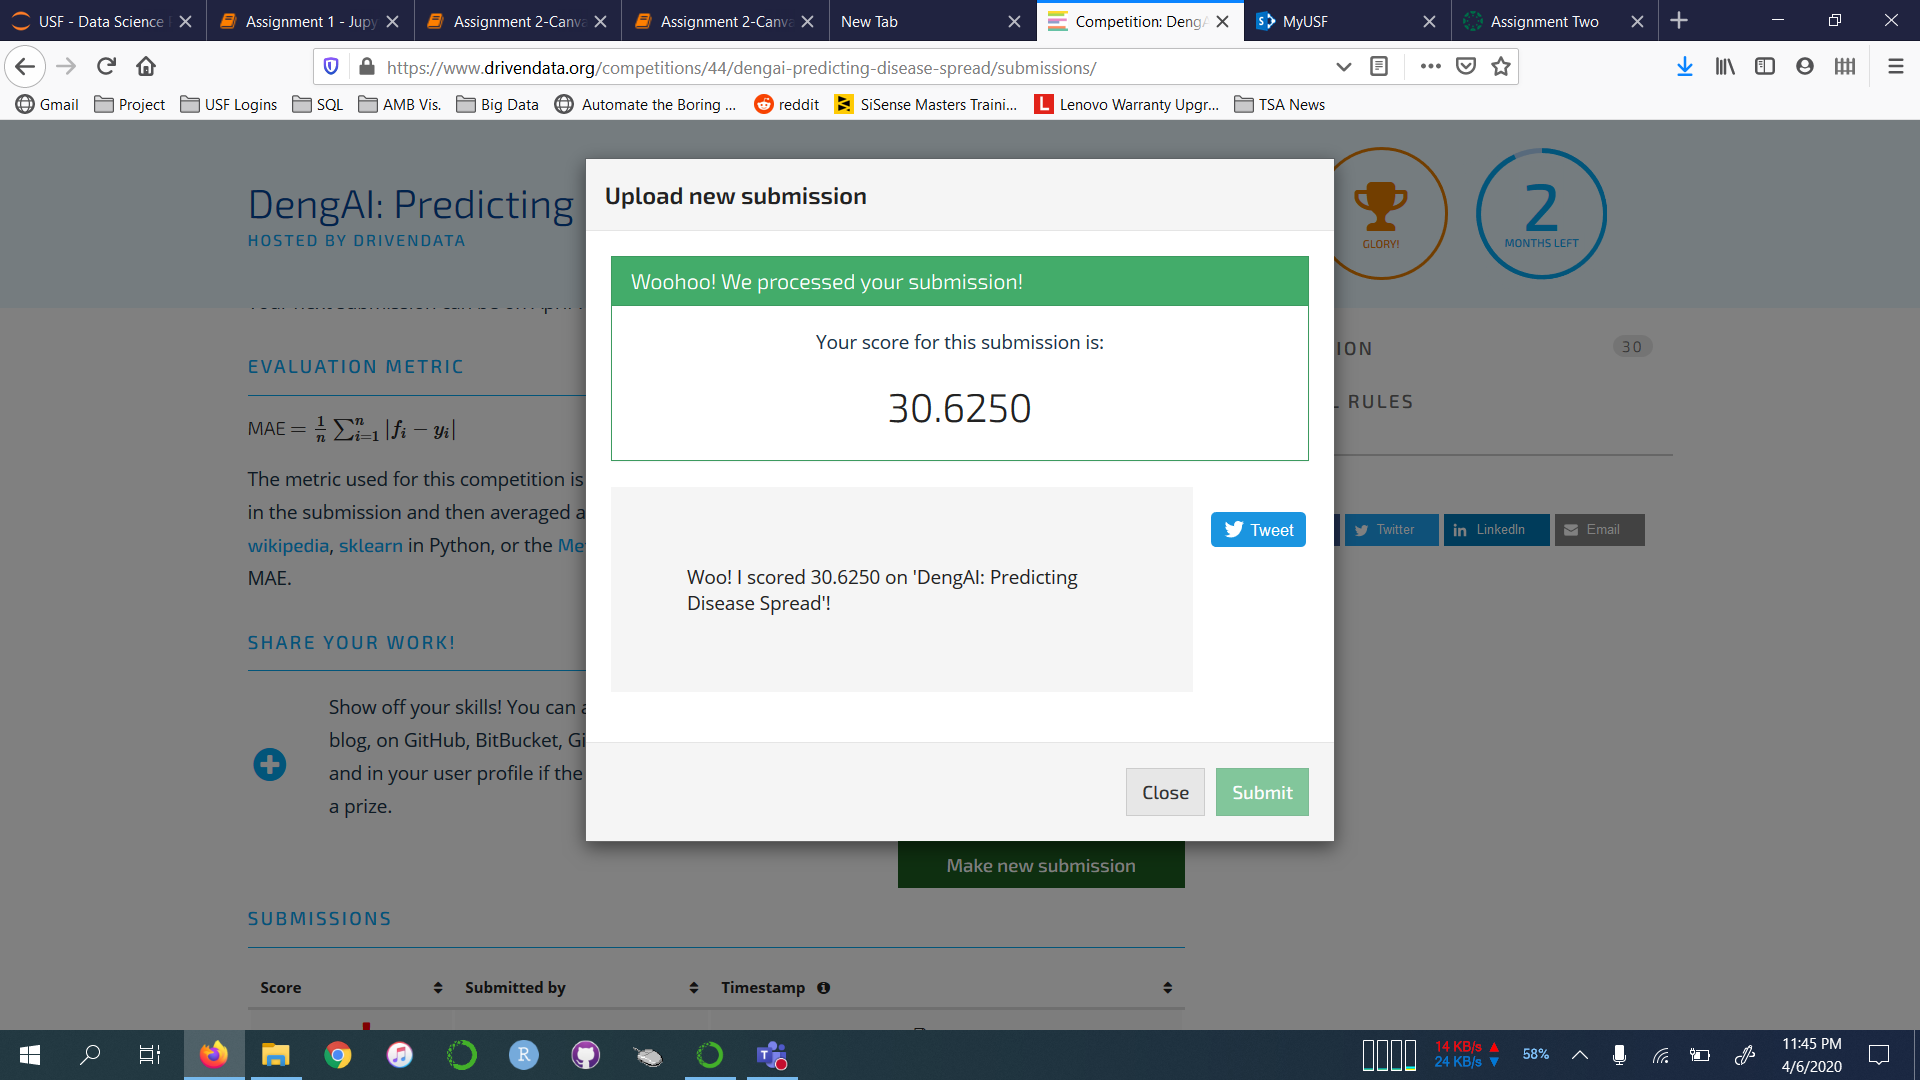

In [143]:
img = Image.open("Screenshot (26).png")
img